In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 22

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 22)                242       
                                                                 
Total params: 1312 (5.12 KB)
Trainable params: 1312 (5.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/16 [>.............................] - ETA: 9s - loss: 3.1277 - accuracy: 0.0469
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
16/16 [==============================] - 1s 13ms/step - loss: 3.0962 - accuracy: 0.0790 - val_loss: 3.0436 - val_accuracy: 0.1517
Epoch 2/1000
 1/16 [>.............................] - ETA: 0s - loss: 3.0785 - accuracy: 0.0703
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
16/16 [==============================] - 0s 3ms/step - loss: 3.0354 - accuracy: 0.1008 - val_loss: 3.0061 - val_accuracy: 0.1442
Epoch 3/1000
 1/16 [>.............................] - ETA: 0s - loss: 3.0347 - accuracy: 0.1250
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
16/16 [==============================] - 0s 3ms/step - loss: 2.9991 - accuracy: 0.1246 - val_loss: 2.9671 - val_accuracy: 0.1229
Epoch 4/1000
 1/16 [>.............................] - ETA: 0s - loss: 3.0009 - accuracy: 0.085

C:\Users\filip\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
16/16 [==============================] - 0s 3ms/step - loss: 2.9198 - accuracy: 0.1519 - val_loss: 2.8627 - val_accuracy: 0.1533
Epoch 6/1000
 1/16 [>.............................] - ETA: 0s - loss: 2.8942 - accuracy: 0.1562
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
16/16 [==============================] - 0s 3ms/step - loss: 2.8511 - accuracy: 0.1559 - val_loss: 2.8003 - val_accuracy: 0.1654
Epoch 7/1000
 1/16 [>.............................] - ETA: 0s - loss: 2.7856 - accuracy: 0.1875
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
16/16 [==============================] - 0s 3ms/step - loss: 2.8048 - accuracy: 0.1580 - val_loss: 2.7337 - val_accuracy: 0.1760
Epoch 8/1000
 1/16 [>.............................] - ETA: 0s - loss: 2.7500 - accuracy: 0.1406
Epoch 8: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
16/16 [=============

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 1ms/step - loss: 0.8761 - accuracy: 0.7678


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 61ms/step
[6.1723307e-02 1.5914515e-09 6.5696049e-03 1.1212958e-04 2.4594089e-01
 2.6356256e-06 2.1654376e-01 9.1218613e-03 5.3474065e-02 2.9133806e-05
 2.2183453e-05 2.7735033e-03 3.6580823e-05 2.2566836e-07 3.3274013e-01
 2.9693741e-09 1.7710717e-02 2.6578033e-09 5.3197138e-02 8.1766078e-09
 1.6841868e-06 4.6811911e-07]
14


# Confusion matrix

21/21 [==============================] - 0s 650us/step


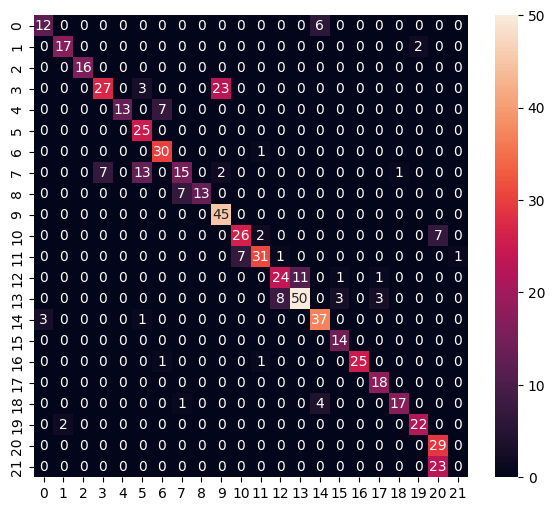

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        18
           1       0.89      0.89      0.89        19
           2       1.00      1.00      1.00        16
           3       0.79      0.51      0.62        53
           4       1.00      0.65      0.79        20
           5       0.60      1.00      0.75        25
           6       0.79      0.97      0.87        31
           7       0.65      0.39      0.49        38
           8       1.00      0.65      0.79        20
           9       0.64      1.00      0.78        45
          10       0.79      0.74      0.76        35
          11       0.89      0.78      0.83        40
          12       0.73      0.65      0.69        37
          13       0.82      0.78      0.80        64
          14       0.79      0.90      0.84        41
          15       0.78      1.00      0.88        14
          16       1.00      0.93      0.96        27
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.savefig("model/keypoint_classifier/current_confusion_matrix.png")
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\filip\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\filip\AppData\Local\Temp\tmptrici9kj\assets


INFO:tensorflow:Assets written to: C:\Users\filip\AppData\Local\Temp\tmptrici9kj\assets


7336

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.1723255e-02 1.5914478e-09 6.5695918e-03 1.1212955e-04 2.4594077e-01
 2.6356249e-06 2.1654396e-01 9.1218613e-03 5.3474069e-02 2.9133798e-05
 2.2183447e-05 2.7735049e-03 3.6580808e-05 2.2566827e-07 3.3274004e-01
 2.9693734e-09 1.7710721e-02 2.6578026e-09 5.3197134e-02 8.1766043e-09
 1.6841864e-06 4.6811897e-07]
14
